<a href="https://colab.research.google.com/github/deviayu05/FinalProject/blob/main/Human_Resource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Faktor Penyebab Rendahnya Tingkat Kedisiplinan Karyawan Perusahaan The Look E-Commerce**


*   Devi Ayu Rachmawati (DBA2304424) - Kelp.149



## **Load Library & Datasets**

**Library**

In [ ]:
# Import all the required libraries
import pandas as pd
import numpy as np

#----- for preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

#---- for model building
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


#---- for visualization---
import matplotlib.pyplot as plt
import seaborn as sns

#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#---- For handling warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#--- For split data
from sklearn.model_selection import train_test_split

**Datasets**

In [ ]:
# Analisi yang dilakukan oleh departemen human resource menggunakan dataset "employees" sebagai primary dataset dan "distribution_centers" sebagai secondary dataset
# Kedua dataset telah digabungkan menggunakan fungsi Right Join melalui Postgresql terlebih dahulu, kemudian diekspor dalam bentuk file CSV
df = pd.read_csv('/content/drive/MyDrive/HumanResource/datasetHR.csv')

## **Data Cleaning**

In [ ]:
# menampilkan 5 data teratas
df

,Fisrt_Name,Last_Name,Gender,Age,Length_Service,Absent_Hours,distribution_centers_id,id,name,latitude,longitude
0,Gutierrez,Molly,F,32.028816,6.018478,36.577306,5,5,New Orleans LA,29.9500,-90.0667
1,Hardwick,Stephen,M,40.320902,5.532445,30.165072,9,9,Charleston SC,32.7833,-79.9333
2,Delgado,Chester,M,48.822047,4.389973,83.807798,10,10,Savannah GA,32.0167,-81.1167
3,Simon,Irene,F,44.599357,3.081736,70.020165,2,2,Chicago IL,41.8369,-87.6847
4,Delvalle,Edward,M,35.697876,3.619091,0.000000,4,4,Los Angeles CA,34.0500,-118.2500
...,...,...,...,...,...,...,...,...,...,...,...
8331,Coniglio,Bianca,F,46.057544,4.838288,93.665111,9,9,Charleston SC,32.7833,-79.9333
8332,Cox,Jimmie,M,34.455490,2.427274,0.000000,1,1,Memphis TN,35.1174,-89.9711
8333,Hawkins,Mary,F,58.347160,4.009393,176.356940,9,9,Charleston SC,32.7833,-79.9333
8334,Proctor,Theresa,F,43.340616,6.154837,60.321917,7,7,Philadelphia PA,39.9500,-75.1667


In [ ]:
# Menghapus atributes yang tidak terpakai
# Atributes Fisrt_Name, Last_Name, Latitude, Longitude, distribution_centers dan id akan dihapus
# Mengganti semua nama atributes dengan huruf kapital

df.drop(['Fisrt_Name', 'Last_Name', 'id', 'name'],axis=1,inplace=True)
df.rename(
    columns=({'distribution_centers_id':'Distribution_Centers_Id', 'latitude':'Latitude', 'longitude':'Longitude'}),
          inplace=True
)
df.head()

,Gender,Age,Length_Service,Absent_Hours,Distribution_Centers_Id,Latitude,Longitude
0,F,32.028816,6.018478,36.577306,5,29.9500,-90.0667
1,M,40.320902,5.532445,30.165072,9,32.7833,-79.9333
2,M,48.822047,4.389973,83.807798,10,32.0167,-81.1167
3,F,44.599357,3.081736,70.020165,2,41.8369,-87.6847
4,M,35.697876,3.619091,0.000000,4,34.0500,-118.2500




**Notes :**

*   Gender : jenis kelamin pegawai
*   Age : usia pegawai
*   Length_Service : lama pegawai bekerja diperusahaan The looker
*   Absent_Hours : lama absen pegawai dalam satu tahun (jam)
*   Distribution_Centers_Id : Id Distribution Centers
*   Latitude : titik koordinat latitude
*   Longitude : titik koordinat longitude

In [ ]:
# Menampilkan ukuran tabel setelah penghapusan atributes
# Terdapat 8336 baris dan 11 kolom

print(df.shape)

(8336, 7)


In [ ]:
# Mengecek tipe data

df.dtypes

Gender                      object
Age                        float64
Length_Service             float64
Absent_Hours               float64
Distribution_Centers_Id      int64
Latitude                   float64
Longitude                  float64
dtype: object

In [ ]:
# Karena tipe data Gender adalah object, maka sesuai aturan Machine Learning akan diubah menjadi tipe data int/float
# Menggunakan dummy encoding
# 0 = Female
# 1 = Male

df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Length_Service,Absent_Hours,Distribution_Centers_Id,Latitude,Longitude,Gender_M
0,32.028816,6.018478,36.577306,5,29.9500,-90.0667,0
1,40.320902,5.532445,30.165072,9,32.7833,-79.9333,1
2,48.822047,4.389973,83.807798,10,32.0167,-81.1167,1
3,44.599357,3.081736,70.020165,2,41.8369,-87.6847,0
4,35.697876,3.619091,0.000000,4,34.0500,-118.2500,1


In [ ]:
# merename atributes gender

df.rename(
    columns=({'Gender_M':'Gender'}),
          inplace=True
)

In [ ]:
# Mengecek tipe data kembali dan memastikan sudah terganti

df.dtypes

Age                        float64
Length_Service             float64
Absent_Hours               float64
Distribution_Centers_Id      int64
Latitude                   float64
Longitude                  float64
Gender                       uint8
dtype: object

In [ ]:
# Mengecek missing values dan dapat dilihat bahwa tidak ada missing values

df.isnull().sum()

Age                        0
Length_Service             0
Absent_Hours               0
Distribution_Centers_Id    0
Latitude                   0
Longitude                  0
Gender                     0
dtype: int64

## **Exploratory Data Analysis**

In [ ]:
# memperlihatkan n baris awal dari sebuah pandas dataframe (default n = 5)

df.head()

,Age,Length_Service,Absent_Hours,Distribution_Centers_Id,Latitude,Longitude,Gender
0,32.028816,6.018478,36.577306,5,29.9500,-90.0667,0
1,40.320902,5.532445,30.165072,9,32.7833,-79.9333,1
2,48.822047,4.389973,83.807798,10,32.0167,-81.1167,1
3,44.599357,3.081736,70.020165,2,41.8369,-87.6847,0
4,35.697876,3.619091,0.000000,4,34.0500,-118.2500,1


In [ ]:
#memperlihatkan n baris akhir dari sebuah pandas dataframe (default n = 5)

df.tail()

,Age,Length_Service,Absent_Hours,Distribution_Centers_Id,Latitude,Longitude,Gender
8331,46.057544,4.838288,93.665111,9,32.7833,-79.9333,0
8332,34.455490,2.427274,0.000000,1,35.1174,-89.9711,1
8333,58.347160,4.009393,176.356940,9,32.7833,-79.9333,0
8334,43.340616,6.154837,60.321917,7,39.9500,-75.1667,0
8335,46.192782,5.174722,112.023389,2,41.8369,-87.6847,1


In [ ]:
#memperlihatkan nama kolom dari sebuah pandas dataframe

df.columns

Index(['Age', 'Length_Service', 'Absent_Hours', 'Distribution_Centers_Id',
       'Latitude', 'Longitude', 'Gender'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8336 non-null   float64
 1   Length_Service           8336 non-null   float64
 2   Absent_Hours             8336 non-null   float64
 3   Distribution_Centers_Id  8336 non-null   int64  
 4   Latitude                 8336 non-null   float64
 5   Longitude                8336 non-null   float64
 6   Gender                   8336 non-null   uint8  
dtypes: float64(5), int64(1), uint8(1)
memory usage: 399.0 KB


In [ ]:
df.describe()

,Age,Length_Service,Absent_Hours,Distribution_Centers_Id,Latitude,Longitude,Gender
count,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000
mean,42.007086,4.782910,61.283978,5.493762,34.667625,-87.987046,0.505758
std,9.939798,2.462990,49.038365,2.872447,4.334152,12.073775,0.499997
min,3.504743,0.012098,0.000000,1.000000,29.760400,-118.250000,0.000000
25%,35.298748,3.575892,19.127590,3.000000,30.694400,-90.066700,0.000000
50%,42.114924,4.600248,56.005808,5.000000,32.783300,-88.043100,1.000000
75%,48.666943,5.623922,94.284692,8.000000,39.950000,-79.933300,1.000000
max,77.938003,43.735239,272.530123,10.000000,41.836900,-73.783400,1.000000


Insights dari Summary:
1. Karyawan The Look E-Commerce rata-rata berusia sekitar 42 tahun.
2. Karyawan The Look E-Commerce rata-rata sudah bekerja di perusahaan selama kurang lebih 4,7 tahun.
3. Rata-rata lamanya absen karyawan dalam 1 tahun kurang lebih 61 jam.





In [ ]:
# Menghitung jumlah karyawan berdasarkan jenis kelaminnya
# Dapat dilihat bahwa ternyata perusahaan The Look E-Commerce didominasi karyawan laki-laki

df['Gender'].value_counts().to_frame()

,Gender
1,4216
0,4120


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


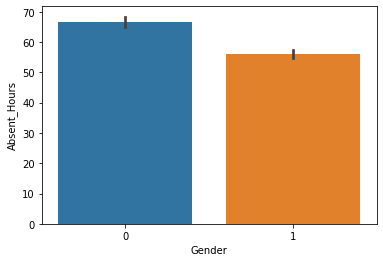

In [ ]:
# Karyawan Wanita di perusahaan The Look E-Commerce lebih sering melakukan izin dibanding karyawan laki-laki

sns.barplot( df['Gender'],df['Absent_Hours'])

**Nama Distribution Centers berdasarkan Id nya**

1.   Memphis TN
2.   Chicago IL
3.   Houston TX
4.   Los Angeles CA
5.   New Orleans LA
6.   Port Authority of New York/New Jersey NY/NJ
7.   Philadelphia PA
8.   Mobile AL
9.   Charleston SC
10.  Savannah GA



In [ ]:
# Menghitung jumlah karyawan berdasarkan nama lokasi kerjanya
# Dapat dilihat bahwa ternyata distribution center dengan Id = 8 = Mobile AL memiliki jumlah karyawan terbanyak

df['Distribution_Centers_Id'].value_counts().to_frame()

,Distribution_Centers_Id
8,859
9,841
1,840
4,838
2,836
6,835
3,831
5,826
10,816
7,814


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


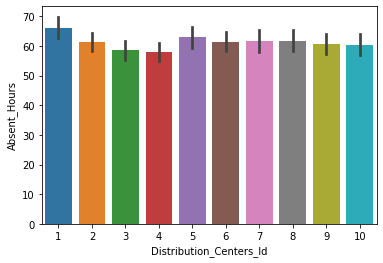

In [ ]:
sns.barplot( df['Distribution_Centers_Id'],df['Absent_Hours'])

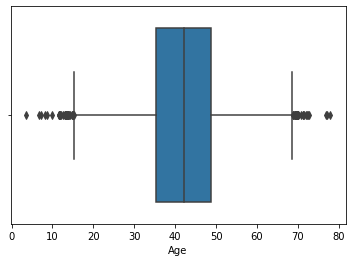

In [ ]:
# Melihat distribusi data pada atributes Age/usia karyawan

sns.boxplot(x='Age', data=df)

In [ ]:
# Handling Outliers Data Age

''' Detection '''
# IQR
Q1 = np.percentile(df['Age'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['Age'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['Age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Age'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)


Old Shape:  (8336, 7)
New Shape:  (8272, 7)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


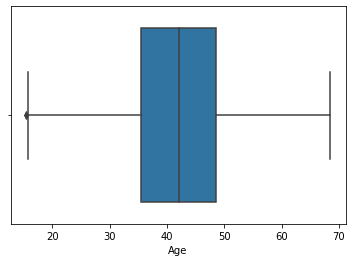

In [ ]:
# Cek ulang distribusi data Age

sns.boxplot(df['Age'])

(array([ 106.,  300.,  735., 1258., 1670., 1753., 1283.,  733.,  310.,
         124.]),
 array([15.36973252, 20.68197345, 25.99421439, 31.30645532, 36.61869625,
        41.93093718, 47.24317812, 52.55541905, 57.86765998, 63.17990092,
        68.49214185]),
 <a list of 10 Patch objects>)

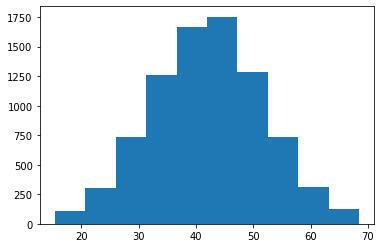

In [ ]:
plt.hist(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


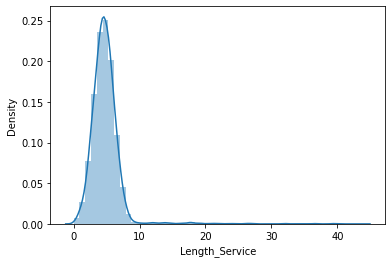

In [ ]:
# Melihat distribusi persebaran data lama rata-rata karyawan bekerja di perusahaan
# Ternyata data tersebut berdistribusi skewed
# Perlu dilakukan handling agar data berdistribusi normal

sns.distplot(df.Length_Service)

In [ ]:
# Normalization Data Skewed

sqrt_Length_Service = np.sqrt(df['Length_Service'])
sqrt_Length_Service

0       2.453259
1       2.352115
2       2.095226
3       1.755487
4       1.902391
          ...   
8331    2.199611
8332    1.557971
8333    2.002347
8334    2.480894
8335    2.274801
Name: Length_Service, Length: 8272, dtype: float64

In [ ]:
sqrt_Length_Service.skew()

1.7294375575401713

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


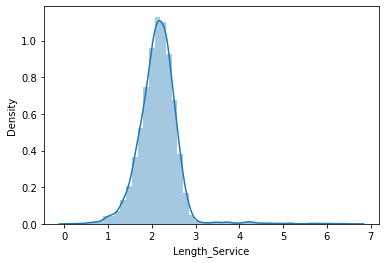

In [ ]:
#visualising by density plot

sns.distplot(sqrt_Length_Service, hist = True)

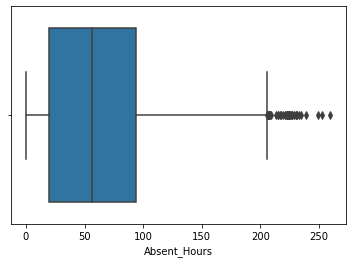

In [ ]:
# Melihat distribusi data pada atributes Absent_Hours / Lamanya karyawan melakukan absen kerja selama 1 tahun

sns.boxplot(x='Absent_Hours', data=df)

In [ ]:
print(df['Absent_Hours'].quantile(0.10))
print(df['Absent_Hours'].quantile(0.95))


0.0
147.762264155


In [ ]:
df["Absent_Hours"] = np.where(df["Absent_Hours"] <0.0, 0.0,df['Absent_Hours'])
df["Absent_Hours"] = np.where(df["Absent_Hours"] >126.87121933, 126.87121933, df['Absent_Hours'])
print(df['Absent_Hours'].skew())

0.13969465108499193


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


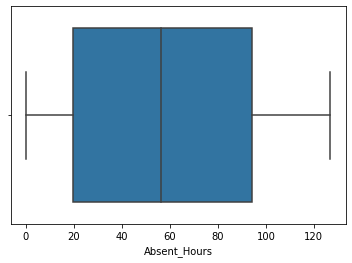

In [ ]:
# Cek ulang distribusi data Absent_Hours

sns.boxplot(df['Absent_Hours'])

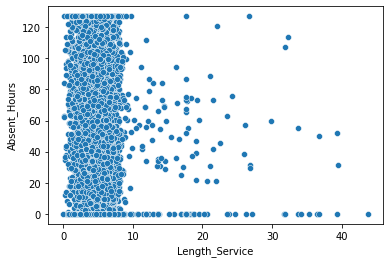

In [ ]:
# Melihat korelasi antar variabel Length_Service
# Hasil diagram di bawah menunjukkan kedua variabel tersebut berkorelasi

sns.scatterplot(data=df, x='Length_Service',y='Absent_Hours')

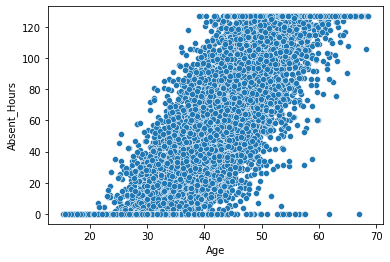

In [ ]:
# Melihat korelasi antar variabel Age
# Hasil diagram di bawah menunjukkan kedua variabel tersebut berkorelasi positif

sns.scatterplot(data=df, x='Age',y='Absent_Hours')

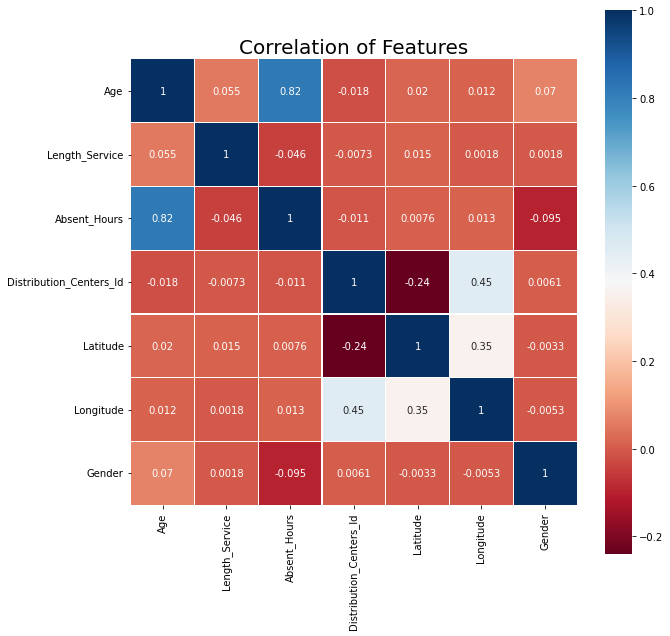

In [ ]:
# Mengetahui nilai korelasi antar variabel

colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
plt.title('Correlation of Features', y=1.0, size=20)
sns.heatmap(df.corr(),linewidths=0.2,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# menentukan fitur yang paling berkorelasi dengan Absent_Hours
# dari data dibawah dapat dilihat ternyata usia karyawan berkorelasi kuat pada lamanya karyawan melakukan absen selama 1 tahun

df.corr()['Absent_Hours'].sort_values()

Gender                    -0.095210
Length_Service            -0.045766
Distribution_Centers_Id   -0.011145
Latitude                   0.007560
Longitude                  0.013169
Age                        0.823459
Absent_Hours               1.000000
Name: Absent_Hours, dtype: float64

## **Modelling & Evaluation**

In [ ]:
# Split data testing dan training dengan porsi 15:85
# Variabel X = Gender, Length_Service, Distribution_Centers_Id, Age
# Variabel Y = Absent_Hours

X = df.drop(columns = ['Absent_Hours','Latitude','Longitude'], axis = 1)
Y = df['Absent_Hours'] / 1000 # di standarisasi

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 101)

print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 1241
number of training samples: 7031


In [ ]:
def model_eval_matrix(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared, mse, rmse, mae

In [ ]:
#-- Linear Regession Model --

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_predict_lr =lr_model.predict(X_test)

In [ ]:
#-- Lasso Regession Model --

lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, Y_train)
Y_predict_lasso =lasso_model.predict(X_test)

In [ ]:
#-- Decision Tree Regession Model --

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
Y_predict_tree =tree_model.predict(X_test)

In [ ]:
#-- Random Forest Regession Model --

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, Y_train)
Y_predict_rf = rf_model.predict(X_test)

In [ ]:
#-- Gradient Boosting Regession Model --

xgb_model = GradientBoostingRegressor(n_estimators=1000, random_state=1)
xgb_model.fit(X_train, Y_train)
Y_predict_xgb = xgb_model.predict(X_test)

In [ ]:
#---Stroring all model performances in dataframe to compare----

metric=[]
ml_models=['Linear Regression', 'Lasso Regession', 'Decision Tree', 'Random Forest', 'GradientBoost']
fitted_models= [lr_model, lasso_model, tree_model, rf_model, xgb_model]
Y_Predict =[Y_predict_lr, Y_predict_lasso, Y_predict_tree, Y_predict_rf, Y_predict_xgb]
i=0
for mod in ml_models:
    R_SQR,MSE,RMSE,MAE = model_eval_matrix(fitted_models[i],X_test,Y_test,Y_Predict[i])
    metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
df_mod_performance=pd.DataFrame(metric,columns =
                  ['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError'])
df_mod_performance[['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError']]

,Model,R-Squared,MeanSquaredError,RootMeanSquaredError,MeanAbsoluteError
0,Linear Regression,0.710544,0.000538,0.023199,0.018569
1,Lasso Regession,-0.000211,0.001860,0.043125,0.037270
2,Decision Tree,0.462440,0.001000,0.031615,0.023137
3,Random Forest,0.706298,0.000546,0.023369,0.017577
4,GradientBoost,0.725741,0.000510,0.022582,0.017235


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


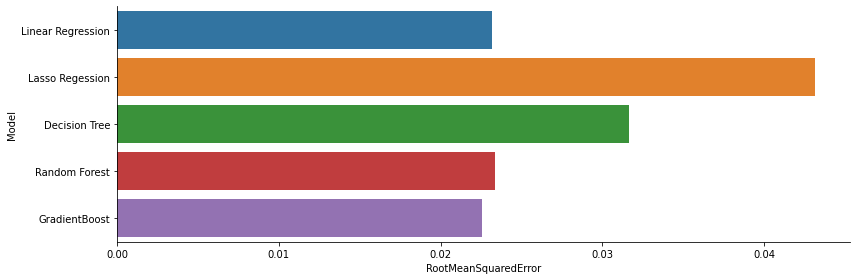

In [ ]:
sns.factorplot(y='Model',x='RootMeanSquaredError',data=df_mod_performance,kind='bar',size=4,aspect=3)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


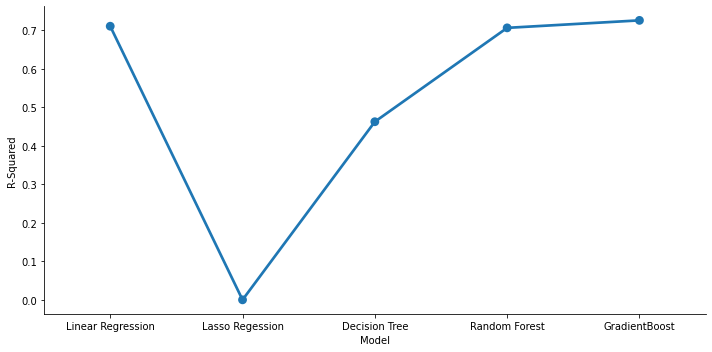

In [ ]:
sns.factorplot(x='Model',y='R-Squared',data=df_mod_performance,kind='point',size=5,aspect=2)

In [ ]:
# Fix Model menggunakan algoritma Gradient Boost

absence_prediction = X_test
absence_prediction['Absent_Hours'] = 1000*Y_test
absence_prediction['Predicted_Absent_Hours'] = 1000*Y_predict_xgb

absence_prediction

,Age,Length_Service,Distribution_Centers_Id,Gender,Absent_Hours,Predicted_Absent_Hours
594,55.865555,4.712703,8,0,126.871219,120.609421
5729,40.249000,3.940640,9,1,123.288910,37.514765
6871,36.101604,6.509524,4,1,55.467001,27.332847
4088,34.786955,5.994043,10,0,16.526338,13.512383
7428,42.945666,3.673088,10,1,66.206338,72.427154
...,...,...,...,...,...,...
6108,34.442195,3.146910,2,1,15.514787,24.167057
3491,43.788678,4.940511,8,0,124.723270,80.942578
4105,35.482551,5.445041,1,0,25.774759,38.454588
3672,36.765000,5.330382,6,1,44.389627,27.838095


In [ ]:
absence_prediction.describe()

,Age,Length_Service,Distribution_Centers_Id,Gender,Absent_Hours,Predicted_Absent_Hours
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,42.281480,4.749070,5.485093,0.518936,58.837267,58.826009
std,9.784751,2.282249,2.892980,0.499843,43.137852,37.688430
min,15.664847,0.227226,1.000000,0.000000,0.000000,-19.840939
25%,35.626371,3.612551,3.000000,0.000000,20.126008,25.494861
50%,42.178440,4.503905,6.000000,1.000000,56.502379,58.494703
75%,48.589444,5.588465,8.000000,1.000000,96.613241,88.218195
max,68.380954,32.350609,10.000000,1.000000,126.871219,144.005505


In [ ]:
# to save final data format for Tableau

absence_prediction.to_excel('final_HR.xls', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  This is separate from the ipykernel package so we can avoid doing imports until
